In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
sns.set_style('whitegrid') 

In [2]:
df = pd.read_csv('../../src/data/city_growth_models/Alexandria population.csv') 

In [3]:
df 

,growth,growthRate,population,year
0,163737,0.023375,7168583,2035
1,156804,0.022898,7004846,2034
2,150073,0.022406,6848042,2033
3,143349,0.021870,6697969,2032
4,137236,0.021385,6554620,2031
...,...,...,...,...
81,43855,0.037817,1203522,1954
82,42199,0.037763,1159667,1953
83,40773,0.037869,1117468,1952
84,39233,0.037816,1076695,1951


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   growth      86 non-null     int64  
 1   growthRate  86 non-null     float64
 2   population  86 non-null     int64  
 3   year        86 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 2.8 KB


In [5]:
df.describe()

,growth,growthRate,population,year
count,86.000000,86.000000,8.600000e+01,86.000000
mean,71292.104651,0.022756,3.450633e+06,1992.500000
std,32316.790081,0.007353,1.685665e+06,24.969982
min,0.000000,0.000000,1.037462e+06,1950.000000
25%,47883.250000,0.020121,2.047988e+06,1971.250000
50%,60260.000000,0.020371,3.148506e+06,1992.500000
75%,92708.500000,0.024351,4.671011e+06,2013.750000
max,163737.000000,0.037869,7.168583e+06,2035.000000


### Outliers

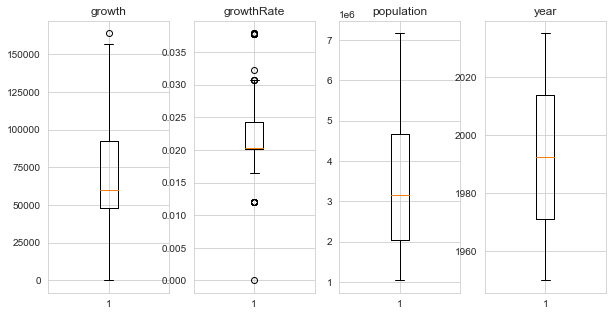

In [6]:
columns = ['growth','growthRate','population','year']
fig, axs = plt.subplots(ncols=len(columns), figsize=(10, 5))
for i, col in enumerate(columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    
plt.show()

In [7]:
def detect_outliers(dataset, columns):
    df = dataset.copy()
    df[columns] = stats.zscore(df[columns])
    outliers = df[(df[columns] < -3) | (df[columns] > 3)]
    print(f"The number of outliers: {outliers.shape[0]}")
    df = df[(df[columns] > -3) & (df[columns] < 3)].reset_index(drop=True)
    return df


In [8]:
detect_outliers(df,'growth')
detect_outliers(df,'growthRate')
detect_outliers(df,'population')

The number of outliers: 0
The number of outliers: 1
The number of outliers: 0


,growth,growthRate,population,year
0,163737,0.023375,2.218565,2035
1,156804,0.022898,2.120860,2034
2,150073,0.022406,2.027293,2033
3,143349,0.021870,1.937741,2032
4,137236,0.021385,1.852203,2031
...,...,...,...,...
81,43855,0.037817,-1.340890,1954
82,42199,0.037763,-1.367059,1953
83,40773,0.037869,-1.392240,1952
84,39233,0.037816,-1.416570,1951


In [9]:
df = df[df['growthRate'] >0]
df

,growth,growthRate,population,year
0,163737,0.023375,7168583,2035
1,156804,0.022898,7004846,2034
2,150073,0.022406,6848042,2033
3,143349,0.021870,6697969,2032
4,137236,0.021385,6554620,2031
...,...,...,...,...
80,45512,0.037816,1249034,1955
81,43855,0.037817,1203522,1954
82,42199,0.037763,1159667,1953
83,40773,0.037869,1117468,1952


array([[<AxesSubplot:title={'center':'growth'}>,
        <AxesSubplot:title={'center':'growthRate'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

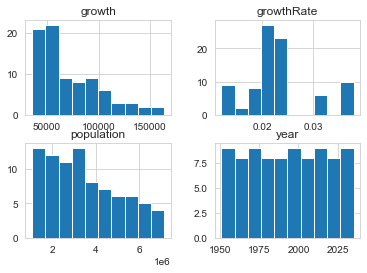

In [10]:
df.hist()

In [11]:
df['City'] = 'Alexandria' 
df['Country'] = 'Egypt' 
df.rename(columns={'year':'Year' } , inplace=True )
df.rename(columns={'growth':'population_growth' , 'growthRate' : 'population_growth_Rate' } , inplace=True )

In [12]:
df.to_csv('../../task 2 data preprocessing/processedData/Alexandria population_processed.csv',index=False)
